# Fresh and Rotten Classification
The Fresh and Rotten/Stale Fruits and Vegetables Classification Dataset is a comprehensive collection of high-quality images specifically curated for the purpose of training and evaluating classification models. This dataset is designed to aid in the development of computer vision algorithms that can accurately distinguish between fresh and rotten/stale produce.

For more Info:- https://www.kaggle.com/datasets/swoyam2609/fresh-and-stale-classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d swoyam2609/fresh-and-stale-classification

100% 2.84G/2.84G [00:28<00:00, 177MB/s]
100% 2.84G/2.84G [00:28<00:00, 106MB/s]


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/fresh-and-stale-classification.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
!ls /content/dataset/Train

freshapples	  freshcapsicum  freshoranges  rottenapples	  rottencapsicum  rottenoranges
freshbanana	  freshcucumber  freshpotato   rottenbanana	  rottencucumber  rottenpotato
freshbittergroud  freshokra	 freshtomato   rottenbittergroud  rottenokra	  rottentomato


In [ ]:
fresh_apples = !ls /content/dataset/Train/freshapples
len(fresh_apples), fresh_apples

(2424,
 [' a_f001.png',
  ' a_f002.png',
  ' a_f003.png',
  ' a_f004.png',
  ' a_f005.png',
  ' a_f006.png',
  ' a_f007.png',
  ' a_f008.png',
  ' a_f009.png',
  ' a_f010.png',
  ' a_f011.png',
  ' a_f012.png',
  ' a_f013.png',
  ' a_f014.png',
  ' a_f015.png',
  ' a_f016.png',
  ' a_f017.png',
  ' a_f018.png',
  ' a_f019.png',
  ' a_f020.png',
  ' a_f021.png',
  ' a_f022.png',
  ' a_f023.png',
  ' a_f024.png',
  ' a_f025.png',
  ' a_f026.png',
  ' a_f027.png',
  ' a_f028.png',
  ' a_f029.png',
  ' a_f030.png',
  ' a_f031.png',
  ' a_f032.png',
  ' a_f033.png',
  ' a_f034.png',
  ' a_f035.png',
  ' a_f036.png',
  ' a_f037.png',
  ' a_f038.png',
  ' a_f039.png',
  ' a_f040.png',
  ' a_f041.png',
  ' a_f042.png',
  ' a_f043.png',
  ' a_f044.png',
  ' a_f045.png',
  ' a_f046.png',
  ' a_f047.png',
  ' a_f048.png',
  ' a_f049.png',
  ' a_f050.png',
  ' a_f051.png',
  ' a_f052.png',
  ' a_f053.png',
  ' a_f054.png',
  ' a_f055.png',
  ' a_f056.png',
  ' a_f057.png',
  ' a_f058.png',
  ' a_f

## Getting the Data and Libraries

In [ ]:
import os
import pathlib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
train_data_path = "/content/drive/MyDrive/food inspection/Train"

In [ ]:
# Counting the number of categories and images they contain.
category = 0

for folder in os.listdir(train_data_path):
  folder_path = os.path.join(train_data_path, folder)
  category += 1

  if os.path.isdir(folder_path):
    img_count = len(os.listdir(folder_path))

    print(f"Number of images in {folder}: {img_count}")

print(f"\n Total Categoreis: {category}")

Number of images in rottenapples: 3258
Number of images in freshcapsicum: 990
Number of images in freshpotato: 536
Number of images in freshbittergroud: 327
Number of images in freshbanana: 2476
Number of images in freshoranges: 1466
Number of images in freshokra: 635
Number of images in freshtomato: 1858
Number of images in freshapples: 2424
Number of images in freshcucumber: 496
Number of images in rottencapsicum: 901
Number of images in rottencucumber: 421
Number of images in rottenbittergroud: 357
Number of images in rottenokra: 338
Number of images in rottenpotato: 802
Number of images in rottenbanana: 2942
Number of images in rottenoranges: 1595
Number of images in rottentomato: 1825

 Total Categoreis: 18


## Exploratory Data Analysis

In [ ]:
num_data = []
label_data = []

for folder in os.listdir(train_data_path):
  folder_path = os.path.join(train_data_path, folder)
  label_data.append(folder)

  if os.path.isdir(folder_path):
    fruit_count = len(os.listdir(folder_path))
    num_data.append(fruit_count)

data = {'Numerical Data': num_data, 'Labeled Data': label_data}
df = pd.DataFrame(data)

In [ ]:
df

,Numerical Data,Labeled Data
0,3258,rottenapples
1,990,freshcapsicum
2,536,freshpotato
3,327,freshbittergroud
4,2476,freshbanana
5,1466,freshoranges
6,635,freshokra
7,1858,freshtomato
8,2424,freshapples
9,496,freshcucumber


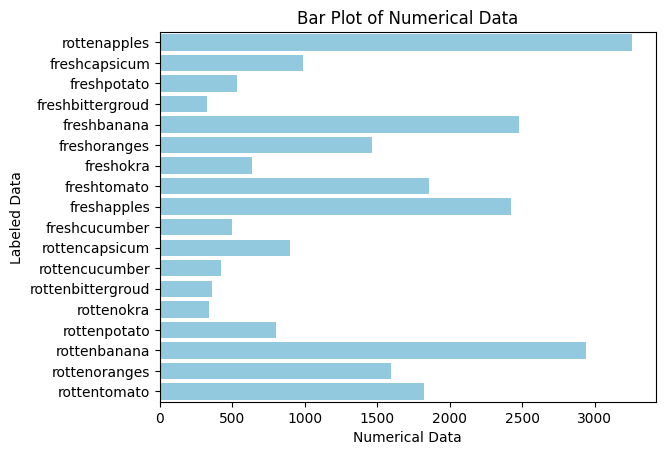

In [ ]:
sns.barplot(x='Numerical Data', y='Labeled Data', data=df, color='skyblue');

plt.xlabel('Numerical Data')
plt.ylabel('Labeled Data')
plt.title('Bar Plot of Numerical Data')

plt.show()

In [ ]:
# Visualizing the images
def view_random_img(dataset_path):
  plt.figure(figsize=(12,6))

  for i in range(1,16):
    random_folder = random.choice(label_data)
    random_folder_path = os.path.join(dataset_path, random_folder)

    img_files = [file for file in os.listdir(random_folder_path) if file.endswith(('.png', '.jpg', '.jpeg'))]

    if img_files:
      random_img = random.choice(img_files)
      img_path = os.path.join(random_folder_path, random_img)

      plt.subplot(3,5,i)
      img = mpimg.imread(img_path)
      plt.imshow(img)
      plt.title(f"Name={random_folder}\n size={img.shape}")

  plt.tight_layout()
  plt.show()

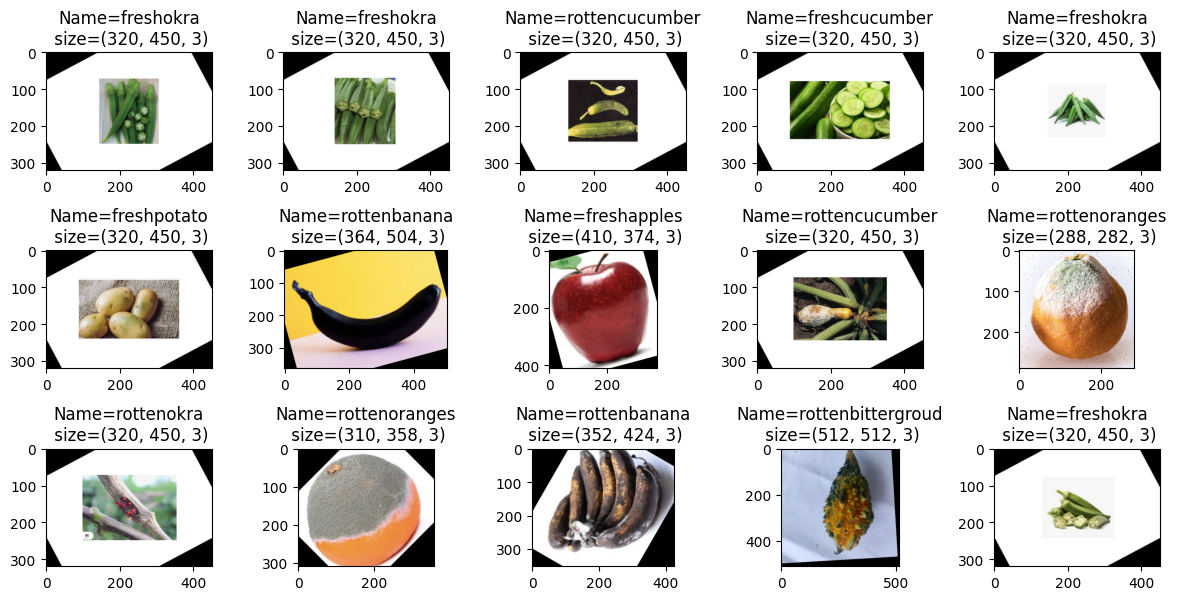

In [ ]:
view_random_img('/content/drive/MyDrive/food inspection/Train')